In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('cancer patient data sets').worksheet('Sheet')

# Get all values from the worksheet
data = worksheet.get_all_values()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
data = pd.DataFrame(data[1:], columns=data[0])


In [ ]:
data.dtypes

,0
Patient Id,object
Age,object
Gender,object
Air Pollution,object
Alcohol use,object
Dust Allergy,object
OccuPational Hazards,object
Genetic Risk,object
chronic Lung Disease,object
Balanced Diet,object


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = data.drop(columns=['Patient Id'])
encoder = LabelEncoder()
categorical_columns = ['Gender', 'Level']
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

data = data.apply(pd.to_numeric, errors='coerce')
data = data.fillna(data.median())
# Separate features (X) and target (y)
X = data.drop(columns=['Level'])
y = data['Level']
# Scale features for KNN (distance-based model)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:
 [[82  0  0]
 [ 0 55  0]
 [ 0  0 63]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform GridSearch
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_knn = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Improved Accuracy:", accuracy)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Improved Accuracy: 1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # Adjust n_components based on explained variance
X_pca = pca.fit_transform(X_scaled)

# Train and evaluate on reduced data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("PCA Reduced Accuracy:", accuracy)


PCA Reduced Accuracy: 1.0


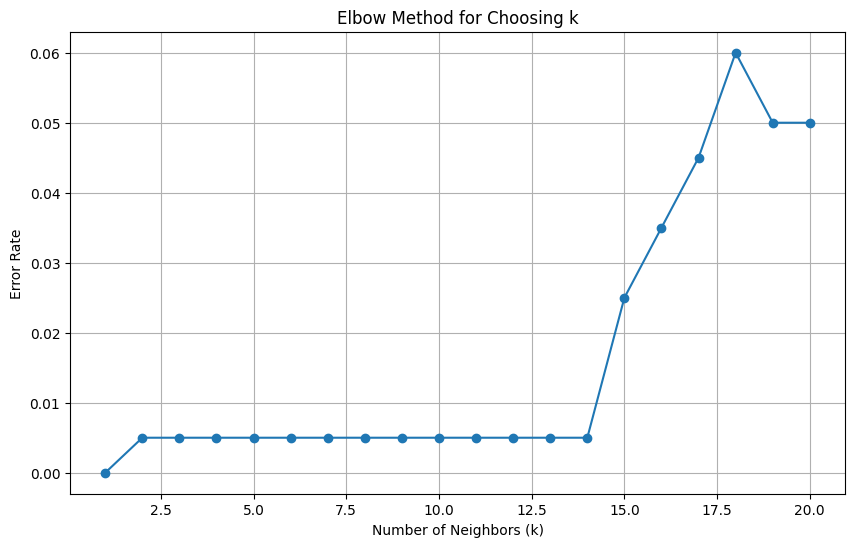

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

error_rates = []
k_values = range(1, 21)  # Testing k values from 1 to 20

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rates.append(1 - accuracy_score(y_test, y_pred))

# Plot error rates vs. k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o')
plt.title("Elbow Method for Choosing k")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.grid()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import auth
import gspread
from google.auth import default

# Authenticate and fetch the dataset from Google Sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Replace with your actual spreadsheet and sheet name
worksheet = gc.open('cancer patient data sets').worksheet('Sheet')
data = worksheet.get_all_values()

# Convert data to DataFrame
columns = [
    'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
    'Dust Allergy', 'Occupational Hazards', 'Genetic Risk', 'chronic Lung Disease',
    'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
    'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing',
    'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough',
    'Snoring', 'Level'
]
df = pd.DataFrame(data[1:], columns=columns)

# Drop unnecessary columns and handle missing values
df.drop('Patient Id', axis=1, inplace=True)
df = df.replace('', np.nan).dropna()

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target variable
X = df.drop('Level', axis=1)
y = df['Level']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Perform GridSearchCV to find the optimal number of neighbors
param_grid = {'n_neighbors': np.arange(1, 31)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Train the KNN model with the best k value
best_k = grid_search.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimal number of neighbors (k): {best_k}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print results
results = {
    'Optimal k': best_k,
    'Accuracy': accuracy,
    'Classification Report': classification_report(y_test, y_pred, output_dict=True),
    'Confusion Matrix': confusion_matrix(y_test, y_pred).tolist()
}
results


Optimal number of neighbors (k): 1
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        66

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[73  0  0]
 [ 0 61  0]
 [ 0  0 66]]


{'Optimal k': 1,
 'Accuracy': 1.0,
 'Classification Report': {'0': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 73.0},
  '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 61.0},
  '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 66.0},
  'accuracy': 1.0,
  'macro avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 200.0},
  'weighted avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 200.0}},
 'Confusion Matrix': [[73, 0, 0], [0, 61, 0], [0, 0, 66]]}